In [81]:
# create our machine learning models

import pandas as pd
import numpy as np
import sklearn as sk

print('pandas ', pd.__version__)
print('numpy ', np.__version__)
print('sklearn', sk.__version__)

pandas  1.0.5
numpy  1.18.5
sklearn 0.23.1


In [82]:
data = pd.read_csv('data/data.csv')
data.shape

(2464, 23)

In [83]:
y = data['Attrition']
print(y)
print(type(y))

0       1
1       0
2       1
3       0
4       0
       ..
2459    1
2460    1
2461    1
2462    1
2463    1
Name: Attrition, Length: 2464, dtype: int64
<class 'pandas.core.series.Series'>


In [84]:
X = data.drop(columns =['Attrition'])
print(X)
print(type(y))

           Age  DailyRate  DistanceFromHome  EmployeeNumber  \
0     0.446350   0.742527         -1.010909       -1.701283   
1     1.322365  -1.297775         -0.147150       -1.699621   
2     0.008343   1.414363         -0.887515       -1.696298   
3    -0.429664   1.461466         -0.764121       -1.694636   
4    -1.086676  -0.524295         -0.887515       -1.691313   
...        ...        ...               ...             ...   
2459 -0.753371  -0.098876         -0.887515        0.296628   
2460 -1.345354   0.607110          0.829274        1.298087   
2461 -1.850294   0.735002          0.219772       -0.004952   
2462 -1.045215  -0.495451          0.393148        0.776320   
2463 -1.505161  -0.355432          0.782607       -1.048411   

      EnvironmentSatisfaction  JobInvolvement  JobLevel   JobRole  \
0                   -0.660531        0.379672 -0.057788  1.032716   
1                    0.254625       -1.026167 -0.057788  0.626374   
2                    1.169781       

In [85]:
# convert X and y to numpy arrays

y = np.asarray(y)
X = np.asarray(X)
print(y)
print(type(y))
print(y.shape)

print(X)
print(type(X))
print(X.shape)

[1 0 1 ... 1 1 1]
<class 'numpy.ndarray'>
(2464,)
[[ 0.4463504   0.74252653 -1.01090934 ... -0.0632959  -0.67914568
   0.24583399]
 [ 1.32236521 -1.2977746  -0.14714972 ...  0.76499762 -0.36871529
   0.80654148]
 [ 0.008343    1.41436324 -0.88751511 ... -1.16768726 -0.67914568
  -1.15593471]
 ...
 [-1.85029423  0.73500173  0.21977154 ... -1.15795719 -0.67641068
  -1.15099468]
 [-1.04521495 -0.49545128  0.39314783 ...  0.5411691   0.99054423
   0.42774361]
 [-1.50516057 -0.35543202  0.78260728 ... -1.16768726 -0.53315458
  -1.15593471]]
<class 'numpy.ndarray'>
(2464, 22)


In [86]:
from sklearn.model_selection import train_test_split

random_seed = 30

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=random_seed)

numerator = y_train[y_train == 1].sum()
denominator = len(y_train)
print("\n", numerator/denominator * 100, " percent of training data is in class 1")
print('len y_train: ', len(y_train))
print('len y_test: ', len(y_test))

numerator2 = y_test[y_test == 1].sum()
denominator2 = len(y_test)
print('\n', numerator2/denominator2 * 100, ' percent of test data is in class 1')


 49.18815663801337  percent of training data is in class 1
len y_train:  2094
len y_test:  370

 54.59459459459459  percent of test data is in class 1


In [93]:
def balanced_accuracy(y_test, y_pred):
    
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    
    for i in range(len(y_test)):
        if y_test[i]==1 and y_pred[i]== 1:
                tp +=1
        elif y_test[i]==0 and y_pred[i]== 0:
                tn +=1
        elif y_test[i]==0 and y_pred[i]== 1:
                fp +=1
        else:
            fn +=1
    
    return 0.5 * ((tp / (tp + fn)) + (tn / (tn + fp))),[tp,tn,fp,fn]

# KNN

In [96]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Train logistic regression model (with default regularization) for binary classification
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train, y_train)

# Make predictions on test data and print the test accuracy
y_pred_knn = knn_model.predict(X_test)
knn_test_accuracy = metrics.accuracy_score(y_test, y_pred_knn)
print('\nTest accuracy: '+str(knn_test_accuracy))

knn_balanced_accuracy, knn_eval_metrics=balanced_accuracy(y_test,y_pred_knn)
print("balanced accuracy: ", knn_balanced_accuracy)

model_accs = {
    'knn': [knn_test_accuracy,knn_balanced_accuracy,knn_eval_metrics]
}


Test accuracy: 0.9135135135135135
balanced accuracy:  0.9057637906647807


# Decision Tree

In [97]:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=8, 
                              random_state=2)
tree.fit(X_train, y_train)


y_pred_tree = tree.predict(X_test)
tree_test_accuracy = metrics.accuracy_score(y_test, y_pred_tree)
print("Test accuracy: "+str(tree_test_accuracy))

tree_balanced_accuracy, tree_eval_metrics=balanced_accuracy(y_test,y_pred_tree)
print("balanced accuracy:", tree_balanced_accuracy)

model_accs['decision tree'] = [tree_test_accuracy,tree_balanced_accuracy,tree_eval_metrics]

Test accuracy: 0.8513513513513513
balanced accuracy: 0.8473302687411599


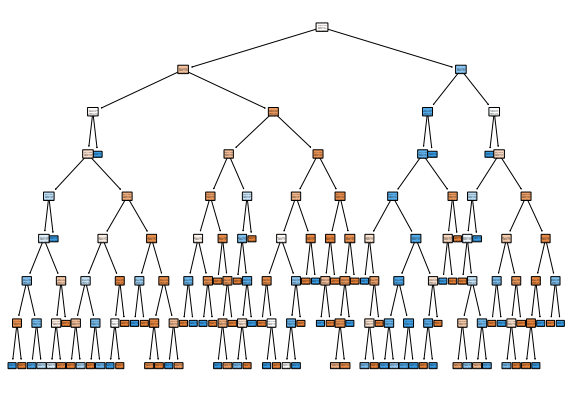

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

plot_tree(tree, 
          filled=True, 
          rounded=True,
          class_names=['Yes', 
                       'No']) 

plt.show()

# SVM

In [98]:
from sklearn import svm

svm_model = svm.SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

svm_test_accuracy = metrics.accuracy_score(y_test, y_pred_svm)
print("Accuracy:",svm_test_accuracy)

svm_balanced_accuracy, svm_eval_metrics=balanced_accuracy(y_test,y_pred_svm)
print("balanced accuracy:", svm_balanced_accuracy)

model_accs['svm'] = [svm_test_accuracy,svm_balanced_accuracy,svm_eval_metrics]

Accuracy: 0.9081081081081082
balanced accuracy: 0.9058227251296558


# Logistic Regression

In [99]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(penalty='l2', random_state=0, solver='liblinear')
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

lr_test_accuracy = metrics.accuracy_score(y_test, y_pred_lr)
print("Accuracy: ", lr_test_accuracy)

lr_balanced_accuracy, lr_eval_metrics=balanced_accuracy(y_test,y_pred_lr)
print("balanced accuracy:", lr_balanced_accuracy)

model_accs['logistic regression'] = [lr_test_accuracy,lr_balanced_accuracy,lr_eval_metrics]

Accuracy:  0.7783783783783784
balanced accuracy: 0.775489156058463


# Neural Network

In [101]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes=(150,100,50), activation='relu')
mlp_model.fit(X_test, y_test)

y_pred_mlp = mlp_model.predict(X_test)

mlp_test_accuracy = metrics.accuracy_score(y_test, y_pred_mlp)
print("Accuracy: ", mlp_test_accuracy)

mlp_balanced_accuracy, mlp_eval_metrics=balanced_accuracy(y_test,y_pred_mlp)
print("balanced accuracy:", mlp_balanced_accuracy)

model_accs['neural network'] = [mlp_test_accuracy,mlp_balanced_accuracy,mlp_eval_metrics]

Accuracy:  1.0
balanced accuracy: 1.0


# Random Forest Classifier

In [102]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(max_depth=20, random_state=0)
rfc_model.fit(X_train, y_train)
y_pred_rfc = rfc_model.predict(X_test)

rfc_test_accuracy = metrics.accuracy_score(y_test, y_pred_rfc)
print("Accuracy: ", rfc_test_accuracy)

rfc_balanced_accuracy, rfc_eval_metrics=balanced_accuracy(y_test,y_pred_rfc)
print("balanced accuracy:", rfc_balanced_accuracy)

model_accs['random forest'] = [rfc_test_accuracy,rfc_balanced_accuracy,rfc_eval_metrics]

Accuracy:  0.9486486486486486
balanced accuracy: 0.949964639321075


# AdaBoost

In [104]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(n_estimators=100, random_state=0)
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)

ada_test_accuracy = metrics.accuracy_score(y_test, y_pred_ada)
print("Accuracy: ", ada_test_accuracy)

ada_balanced_accuracy, ada_eval_metrics=balanced_accuracy(y_test,y_pred_ada)
print("balanced accuracy:", ada_balanced_accuracy)

model_accs['adaboost'] = [ada_test_accuracy,ada_balanced_accuracy,ada_eval_metrics]

Accuracy:  0.9027027027027027
balanced accuracy: 0.904879773691655


# Gradient Boosting

In [103]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_model = GradientBoostingClassifier(random_state=0)
gbc_model.fit(X_train, y_train)
y_pred_gbc = gbc_model.predict(X_test)

gbc_test_accuracy = metrics.accuracy_score(y_test, y_pred_gbc)
print("Accuracy: ", gbc_test_accuracy)

gbc_balanced_accuracy, gbc_eval_metrics=balanced_accuracy(y_test,y_pred_gbc)
print("balanced accuracy:", gbc_balanced_accuracy)

model_accs['gradient boost'] = [gbc_test_accuracy,gbc_balanced_accuracy,gbc_eval_metrics]

Accuracy:  0.9162162162162162
balanced accuracy: 0.9197607260726073


In [35]:
models = []
accs = []
for model, accuracy in model_accs.items():
    print(model, ': ', accuracy)
    models.append(model)
    accs.append(accuracy)

knn :  0.9135135135135135
decision tree :  0.8513513513513513
svm :  0.9081081081081082
logistic regression :  0.7783783783783784
neural network :  1.0
random forest :  0.9486486486486486
adaboost :  0.9027027027027027
gradient boost :  0.9162162162162162


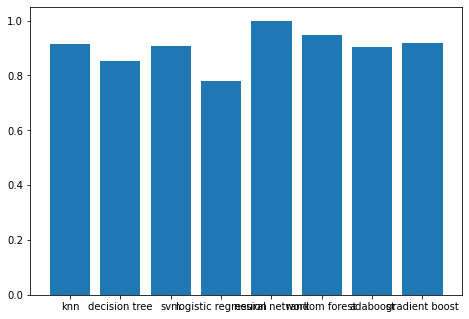

In [36]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(models, accs)
plt.show()

# Sachi TODO:

- For random forest classifier and decision tree, plot the accuracy of the model as maximum tree depth increases (start at depth 1 and go up to 30) hint use a for loop
- Do the same thing for KNN plot accuracy as number of neighbors increases
- Start by plotting validation curve for KNN then try with other models
- Try to plot ROC curves
- Calculate balanced accuracy *****
- Calculate precision
- Calculate F1
- True negative, false negative, true positive, false positive